In [3]:
#Import all relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
rawdata = pd.read_csv("regression_data_clean.csv")

In [5]:
rawdata.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [6]:
#Inpspecting the data types and checking for Null values

rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [ ]:
#Inspecting the columns. Checking the types of data and values in the columns. 

In [7]:
rawdata['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [8]:
rawdata['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [9]:
rawdata['sqft_living'].nunique()

1034

In [10]:
rawdata['sqft_lot'].nunique()

9776

In [11]:
rawdata['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [12]:
rawdata['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [13]:
rawdata['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [14]:
rawdata['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [15]:
rawdata['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [16]:
rawdata['sqft_above'].nunique()

942

In [17]:
rawdata['sqft_basement'].nunique()

306

In [19]:
rawdata['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [20]:
rawdata['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [21]:
rawdata['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [23]:
rawdata['lat'].value_counts()

47.6624    17
47.5322    17
47.6846    17
47.5491    17
47.6886    16
           ..
47.2495     1
47.3847     1
47.4142     1
47.4237     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

In [22]:
rawdata['long'].value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751, dtype: int64

In [24]:
rawdata['price'].value_counts()

450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
788600      1
700180      1
436300      1
329800      1
435010      1
Name: price, Length: 3622, dtype: int64

In [ ]:
#Further inspection of the Data

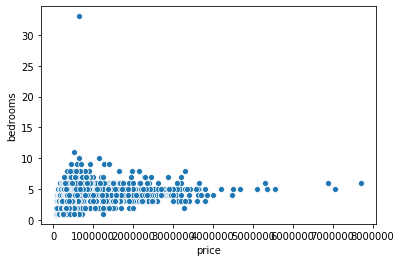

In [30]:
sns.scatterplot(data=rawdata, x='price', y='bedrooms')

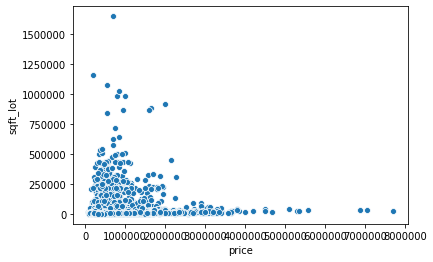

In [18]:
sns.scatterplot(data=rawdata, x='price', y='sqft_lot')

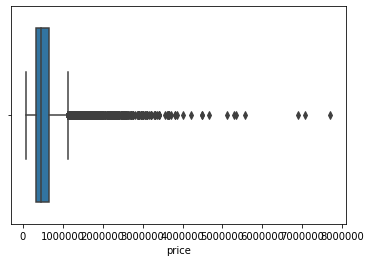

In [26]:
sns.boxplot(x=rawdata["price"])

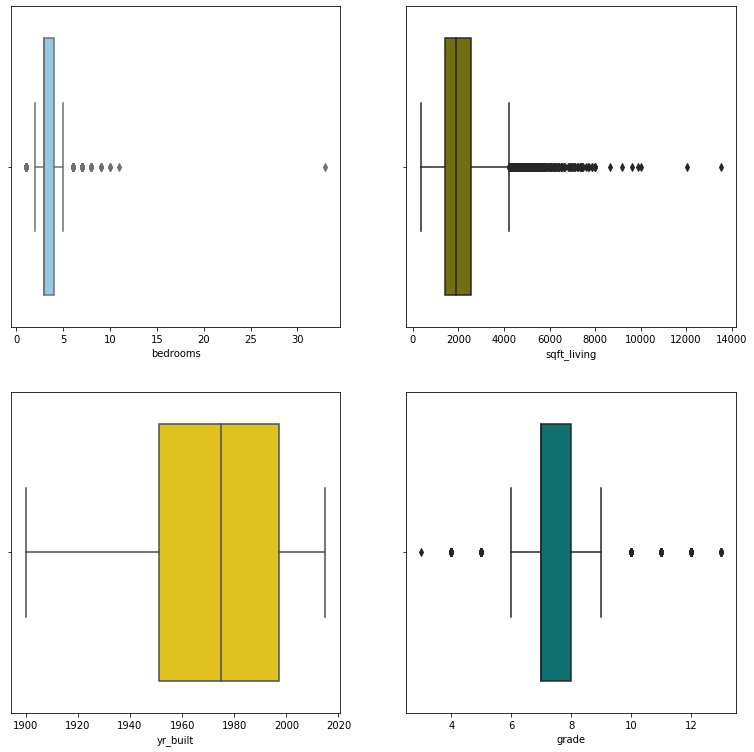

In [19]:
f, axes = plt.subplots(2, 2, figsize=(13, 13), sharex=False)
sns.boxplot(x=rawdata["bedrooms"] , color="skyblue", ax=axes[0, 0])
sns.boxplot(x=rawdata["sqft_living"] , color="olive", ax=axes[0, 1])
sns.boxplot(x=rawdata["yr_built"], color="gold", ax=axes[1, 0])
sns.boxplot(x=rawdata["grade"] , color="teal", ax=axes[1, 1])

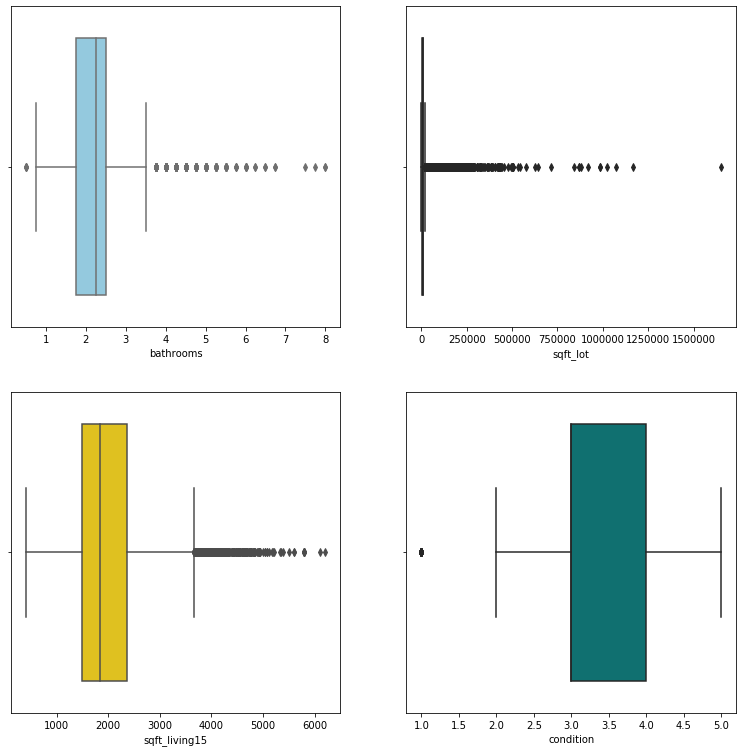

In [23]:
f, axes = plt.subplots(2, 2, figsize=(13, 13), sharex=False)
sns.boxplot(x=rawdata["bathrooms"] , color="skyblue", ax=axes[0, 0])
sns.boxplot(x=rawdata["sqft_lot"] , color="olive", ax=axes[0, 1])
sns.boxplot(x=rawdata["sqft_living15"], color="gold", ax=axes[1, 0])
sns.boxplot(x=rawdata["condition"] , color="teal", ax=axes[1, 1])

In [ ]:
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'

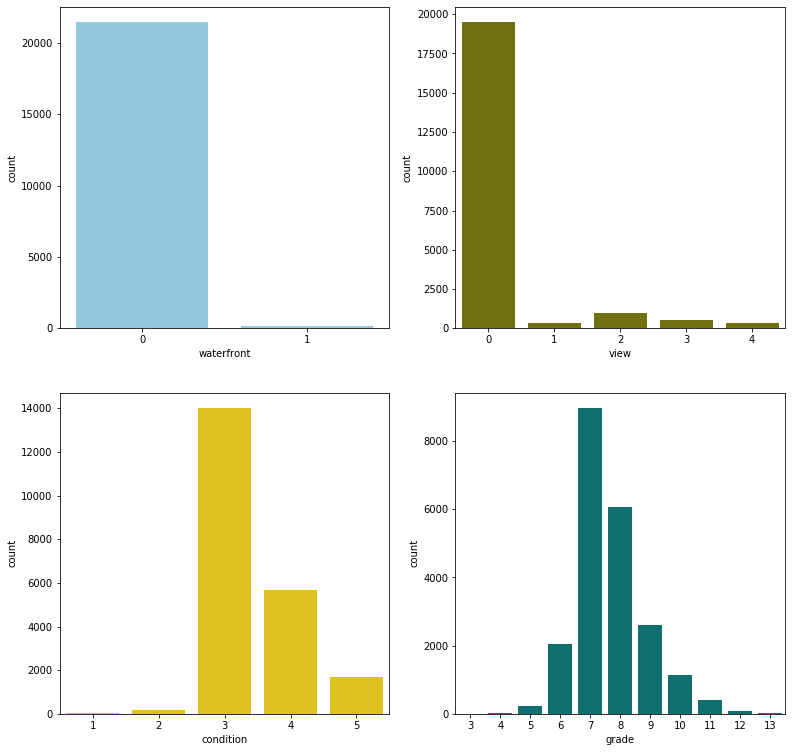

In [31]:
f, axes = plt.subplots(2, 2, figsize=(13, 13), sharex=False)
sns.countplot(rawdata["waterfront"], color="skyblue", ax=axes[0, 0])
sns.countplot(rawdata["view"] , color="olive", ax=axes[0, 1])
sns.countplot(rawdata["condition"] , color="gold", ax=axes[1, 0])
sns.countplot(rawdata["grade"] , color="teal", ax=axes[1, 1])



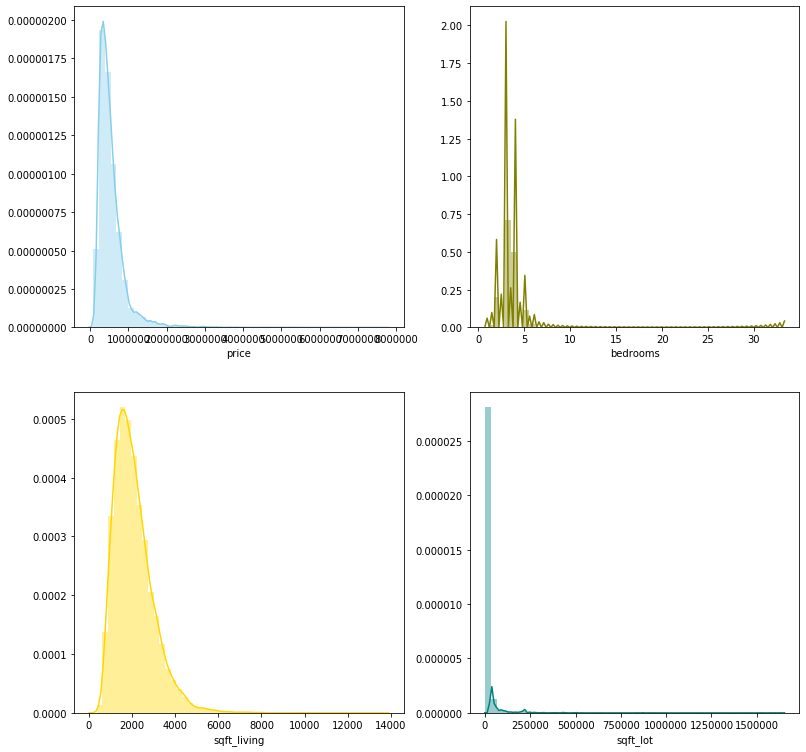

In [27]:
f, axes = plt.subplots(2, 2, figsize=(13, 13), sharex=False)
sns.distplot( rawdata["price"] , color="skyblue", ax=axes[0, 0])
sns.distplot( rawdata["bedrooms"] , color="olive", ax=axes[0, 1])
sns.distplot( rawdata["sqft_living"] , color="gold", ax=axes[1, 0])
sns.distplot( rawdata["sqft_lot"] , color="teal", ax=axes[1, 1])

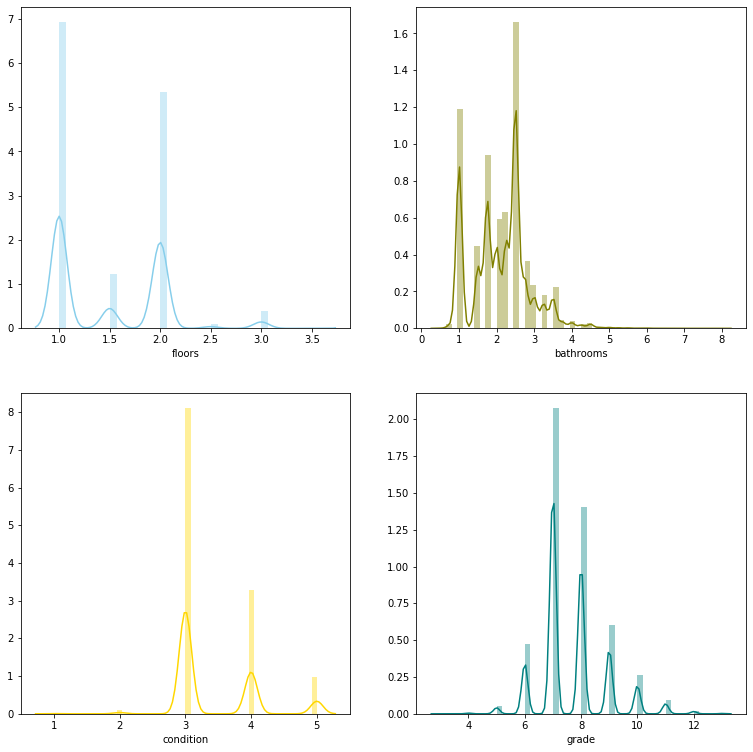

In [29]:
f, axes = plt.subplots(2, 2, figsize=(13, 13), sharex=False)
sns.distplot( rawdata["floors"] , color="skyblue", ax=axes[0, 0])
sns.distplot( rawdata["bathrooms"] , color="olive", ax=axes[0, 1])
sns.distplot( rawdata["condition"] , color="gold", ax=axes[1, 0])
sns.distplot( rawdata["grade"] , color="teal", ax=axes[1, 1])

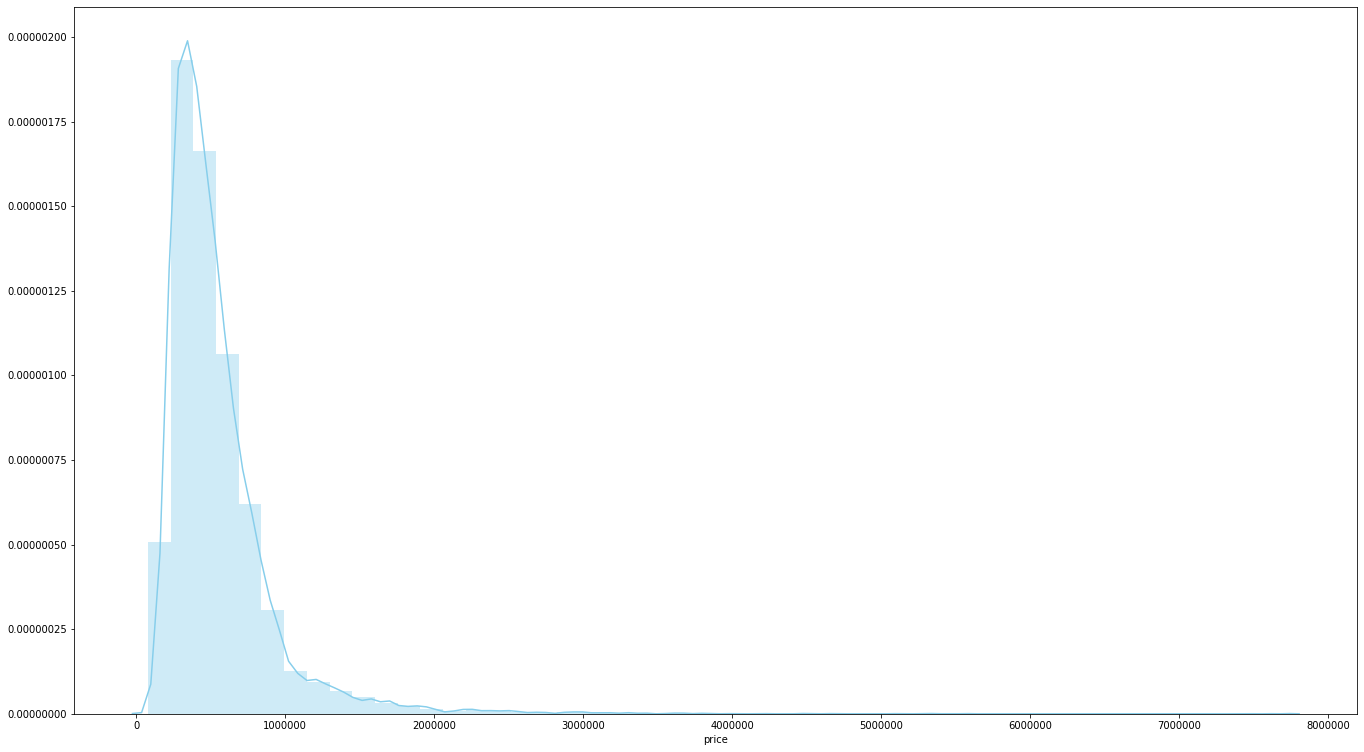

In [33]:
f, axes = plt.subplots(1, 1, figsize=(23, 13), sharex=False)
sns.distplot( rawdata["price"] , color="skyblue")


In [32]:
rawdata.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

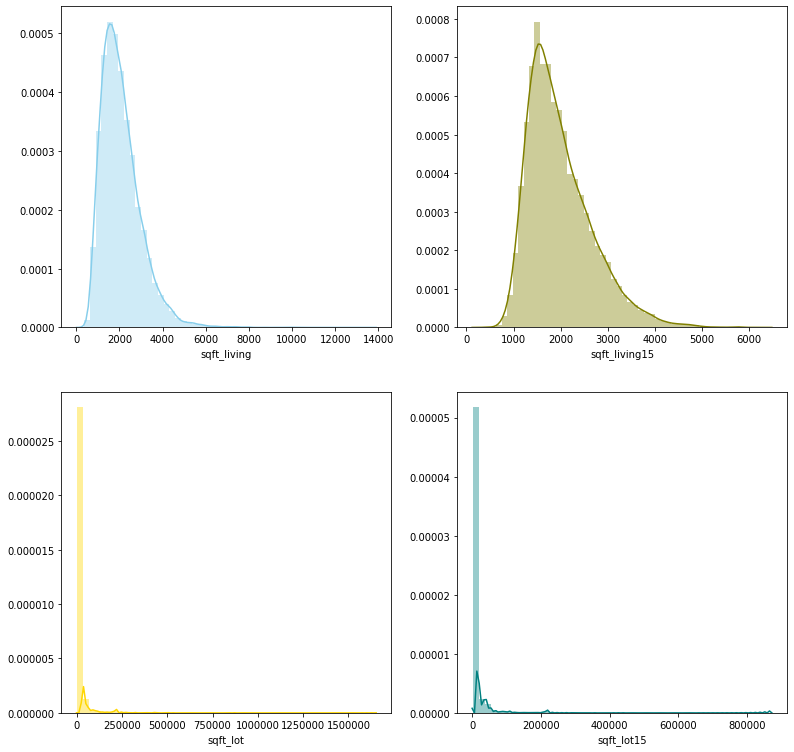

In [33]:
f, axes = plt.subplots(2, 2, figsize=(13, 13), sharex=False)
sns.distplot( rawdata["sqft_living"] , color="skyblue", ax=axes[0, 0])
sns.distplot( rawdata["sqft_living15"] , color="olive", ax=axes[0, 1])
sns.distplot( rawdata["sqft_lot"] , color="gold", ax=axes[1, 0])
sns.distplot( rawdata["sqft_lot15"] , color="teal", ax=axes[1, 1])